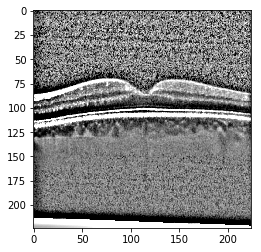

In [5]:
import scipy.signal as sg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pywt
import math
import HPreprocess as Preprocess 
import HDataset as Dataset
from sklearn.decomposition import PCA
from scipy.interpolate import interp1d
from sklearn.feature_extraction import image as slicer
from tqdm import tqdm

image = cv2.imread('/workspace/DeepLearning_AMD/DataSet/octimage/test/NORMAL/NORMAL-2095710-1.jpeg')
imageL = Preprocess.claheLabChannel(image)
image = cv2.resize(image,(224,224),cv2.INTER_LINEAR_EXACT)

imageGray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

imageE = Preprocess.imageEnhanced(imageGray)
ecap =  interp1d([imageE.min(),imageE.max()],[0,255])
imageE = ecap(imageE)

filt = (1/100)*np.ones((10,10))
convim = cv2.filter2D(imageL,-1,filt)
'''
imgs = slicer.extract_patches(convim, patch_shape=(10,10,3),extraction_step=10)
imgsr = imgs.reshape(-1,10,10,3)
imx1 = imgsr.mean(axis=1)
imx2 = imx1.mean(axis=1)
imgres = imx2.reshape(224,224,3).astype('uint8')
imageE = Preprocess.imageEnhanced(imgres)
coeffs2GRAY = pywt.dwt2(convim[:,:,1], 'Haar',mode='zero')
LLgray, (LHgray, HLgray, HHgray) = coeffs2GRAY
m1 =  interp1d([LLgray.min(),LLgray.max()],[0,255])
LLgray = m1(LLgray)
coeffs2GRAY2 = pywt.dwt2(LLgray, 'Haar',mode='zero')
LLgray2, (LHgray2, HLgray2, HHgray2) = coeffs2GRAY2
m2 = interp1d([LLgray2.min(),LLgray2.max()],[0,255])
LLgray2 = m2(LLgray2)
coeffs2GRAY3 = pywt.dwt2(LLgray2, 'Haar',mode='zero')
LLgray3, (LHgray3, HLgray3, HHgray3) = coeffs2GRAY3
m3 = interp1d([LLgray3.min(),LLgray3.max()],[0,255])
coeffs2GRAY4 = pywt.dwt2(LLgray3, 'Haar',mode='zero')
LLgray4, (LHgray4, HLgray4, HHgray4) = coeffs2GRAY4
m4 = interp1d([LLgray4.min(),LLgray4.max()],[0,255])
LLgray4 = m4(LLgray4)
plt.imshow(convim[:,:,1],cmap='gray')
'''
filt = (1/100)*np.ones((10,10))
convim = cv2.filter2D(imageL,-1,filt)
plt.imshow(imageE,cmap='gray')

In [6]:
def sobel_Gradient(img):
    sobx = cv2.Sobel(img[:,:,1],cv2.CV_64F,1,0,ksize=15)
    soby = cv2.Sobel(img[:,:,1],cv2.CV_64F,0,1,ksize=15)
    alpha = 0.3
    sobxy = alpha*sobx + (1-alpha)*soby 
    sobCapxy =  interp1d([sobxy.min(),sobxy.max()],[0,255])
    sop_imxy = sobCapxy(sobxy)
    claheSopxy = cv2.createCLAHE(clipLimit=1, tileGridSize=(3,3))
    sop_imCLxy = claheSopxy.apply(sop_imxy.astype('uint8'))
    return sop_imCLxy

def treshold_Enhance(img):
    ret,thresh1 = cv2.threshold(image,40,255,cv2.THRESH_TOZERO)
    thresh1 = cv2.GaussianBlur(thresh1,(5,5),0)
    ret2,thresh2 = cv2.threshold(thresh1,30,255,cv2.THRESH_TOZERO)
    return thresh2

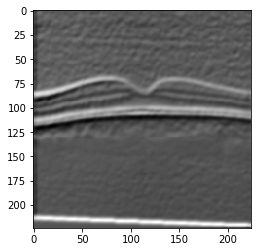

In [7]:
im_tresh = sobel_Gradient(image)
plt.imshow(im_tresh,cmap='gray')

In [ ]:
from skimage.transform import radon,frt2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(imageE, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(imageE.shape), endpoint=False)
sinogram = radon(imageE, theta=theta, circle=False)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

In [ ]:
from skimage.transform import radon,frt2
def radon_extraction(img):
    theta = np.linspace(0., 180., max(img.shape), endpoint=False)
    sinogram = radon(img, theta=theta, circle=False)
    return sinogram

In [ ]:
imsobel = sobel_Gradient(image)
plt.imshow(imsobel,cmap='gray')

In [ ]:
imageGrad = image[:,:,1]
thd_update = 10
gradient_count = 0
gradient_pic = np.zeros(imageGrad.shape)
for i in range(imageGrad.shape[0]):
    previous_val = imageGrad[i,0].astype('float64')
    for j in range(imageGrad.shape[1]):
        val = imageGrad[i,j].astype('float64')
        if np.absolute(previous_val-val)>thd_update:
            if val-previous_val > 0:
                gradient_count += 1.0
            else:
                gradient_count -= 1.0
            previous_val = val
        else:
            gradient_count -= 1.0
            if gradient_count<0:
                gradient_count = 0
        gradient_pic[i,j] =  gradient_count
        if previous_val-val > thd_update and j >=194:
            gradient_count = 0        
    gradient_count = 0

gradient_count = 0
gradient_pic1 = np.zeros(imageGrad.shape)
for i in range(imageGrad.shape[0]-1,-1,-1):
    previous_val = imageGrad[i,imageGrad.shape[1]-1].astype('float64')
    for j in range(imageGrad.shape[1]-1,-1,-1):
        val = imageGrad[i,j].astype('float64')
        if np.absolute(previous_val-val)>thd_update:
            if val-previous_val > 0:
                gradient_count += 1.0
            else:
                gradient_count -= 1.0
            previous_val = val
        else:
            gradient_count -= 1.0
            if gradient_count<0:
                gradient_count = 0
                
        if previous_val-val > thd_update and j<=30:
            gradient_count = 0
        gradient_pic1[i,j] = gradient_count  
        
    gradient_count = 0
    

gradient_count = 0
gradient_pic2 = np.zeros(imageGrad.shape)
for j in range(imageGrad.shape[1]):
    previous_val = imageGrad[0,j].astype('float64')
    for i in range(imageGrad.shape[0]):
        val = imageGrad[i,j].astype('float64')
        if np.absolute(previous_val-val)>thd_update:
            if val-previous_val > 0:
                gradient_count += 1.0
            else:
                gradient_count -= 1.0
            previous_val = val
        
        else:
            gradient_count -= 1.0
            if gradient_count<0:
                gradient_count = 0
                
        if i>=194:
            gradient_count = 0            
        gradient_pic2[i,j] = gradient_count  
         
    gradient_count = 0

gradient_count = 0
gradient_pic3 = np.zeros(imageGrad.shape)
for j in range(imageGrad.shape[1]-1,-1,-1):
    previous_val = imageGrad[imageGrad.shape[0]-1,j].astype('float64')
    for i in range(imageGrad.shape[0]-1,-1,-1):
        val = imageGrad[i,j].astype('float64')
        if np.absolute(previous_val-val)>thd_update:
            if val-previous_val > 0:
                gradient_count += 1.0
            else:
                gradient_count -= 1.0
            previous_val = val
        
        else:
            gradient_count -= 1.0
            if gradient_count<0:
                gradient_count = 0
                
        if  i<=30:
            gradient_count = 0            
        gradient_pic3[i,j] =  gradient_count
        
    gradient_count = 0

In [ ]:
gradient_pic3

In [ ]:
gradCap3 =  interp1d([gradient_pic3.min(),gradient_pic3.max()],[0,255])
plt.imshow(gradCap3(gradient_pic3),cmap='gray')

In [ ]:
gradCap2 =  interp1d([gradient_pic2.min(),gradient_pic2.max()],[0,255])
plt.imshow(gradient_pic2-gradient_pic2.min(),cmap='gray')

In [ ]:
plt.imshow(gradient_pic.astype('uint8')+128,cmap='gray')

In [ ]:
gradCap1 =  interp1d([gradient_pic1.min(),gradient_pic1.max()],[0,255])
plt.imshow(gradCap1(gradient_pic1).astype('uint8'),cmap='gray')

In [ ]:
alpha = 0.5
beta = 1-alpha
gradient_t = alpha*(gradient_pic+gradient_pic1)+beta*(gradient_pic2+gradient_pic3)
gradCap_t =  interp1d([gradient_t.min(),gradient_t.max()],[0,255])
plt.imshow(gradCap_t(gradient_t).astype('uint8'),cmap='gray')

In [ ]:
gradient_guid = gradCap_t(gradient_t).astype('uint8')
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(9,9))
gradient_CL = clahe.apply(gradient_guid)
filt1 = (1/5)*np.array(([0,1,0],[1,1,1],[0,1,0]))
convim1 = cv2.filter2D(gradient_guid,-1,filt1)
plt.imshow(convim1,cmap='gray')

In [ ]:
plt.imshow(image[:,:,1],cmap='gray')

In [ ]:
duoy = gradient_pic2+gradient_pic3
cap_duoy = interp1d([duoy.min(),duoy.max()],[0,(duoy.max()-duoy.min())])
plt.imshow(cap_duoy(duoy).astype('uint8'),cmap='gray')

In [ ]:
duox = gradient_pic+gradient_pic1
cap_duox = interp1d([duox.min(),duox.max()],[0,(duox.max()-duox.min())])
plt.imshow(cap_duox(duox).astype('uint8'),cmap='gray')

In [ ]:
(gradient_pic+gradient_pic1).max()

In [ ]:
plt.imshow(convim[:,:,1],cmap='gray')

In [ ]:
imageGu = cv2.addWeighted(src1 = convim,alpha = 4, src2 = cv2.GaussianBlur(src=convim,ksize=(0,0),sigmaX=15),beta = -4,gamma = 128).astype('uint8') 
plt.imshow(imageGu[:,:,1],cmap='gray')

In [ ]:
from sklearn.feature_extraction import image as slicer
imgs3 = slicer.extract_patches(imageL, patch_shape=(15,15,3),extraction_step=1)
imgsr3 = imgs3.reshape(-1,15,15,3)
imx13 = imgsr3.mean(axis=1)
imx23 = imx13.mean(axis=1)
imgres3 = imx23.reshape(2426,2426,3)

imgs4 = slicer.extract_patches(imgres3, patch_shape=(10,10,3),extraction_step=10)
imgsr4 = imgs4.reshape(-1,10,10,3)
imx14 = imgsr4.mean(axis=1)
imx24 = imx14.max(axis=1)
imgres4 = imx24.reshape(242,242,3)

In [ ]:
plt.imshow(imgres4.astype('uint8'))

In [ ]:
def cornerEigen_fe(img):
    edgeFe = cv2.cornerEigenValsAndVecs(img,blockSize=3,ksize=7)
    return np.array([edgeFe[:,:,0],edgeFe[:,:,1]])

In [ ]:
x = cornerEigen_fe(imageGray)

In [ ]:
plt.imshow(x[0,:,:],cmap='gray')

In [ ]:
scale = interp1d([imageE.min(),imageE.max()],[0,255])
imageES = scale(imageE)
plt.imshow(((imageES[:,:,1]+imageES[:,:,2])/2).astype("uint8"),cmap='gray')

In [ ]:
imageE.shape

In [ ]:
plt.imshow(imgE1)

In [ ]:
plt.imshow(imageGray,cmap='gray')

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
src = imageE.astype('uint8')
# Initiate STAR detector
orb = cv2.ORB_create(nfeatures = 50,
    scaleFactor = 1.2,
    nlevels = 8,
    edgeThreshold = 15,
    firstLevel = 1,
    WTA_K = 2,
    patchSize = 50,
    fastThreshold = 40 
    )
# find the keypoints with ORB
kp = orb.detect(src,None)

# compute the descriptors with ORB
kp, des = orb.compute(src, kp)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(src,kp,src,color=(0,255,0), flags=0)
plt.imshow(img2),plt.show()


In [ ]:
plt.imshow(LLgray2.astype('uint8'), cmap='gray')

In [ ]:
plt.imshow(LHgray3, cmap='gray')

In [ ]:
plt.imshow(HLgray3, cmap='gray')

In [ ]:
plt.imshow(HHgray2, cmap='gray')

#######PCA######

In [ ]:
import HPreprocess as P
import HDataset as D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import linalg as LA
from numpy.random import permutation
import cv2
import pickle
import random
from tqdm import tqdm
from skimage.transform import radon,frt2
ref = random.sample(range(10000, 40000),1)[0]

data = D.txt_to_var('traintestset1.txt')
#data = D.txt_tofold_var('/workspace/DeepLearning_AMD/Deep/Datamaneger/fold/train_fold_3.txt')
data = permutation(data)
x_train = data[0:4000]


#x_train = data
def balance_data(dataRaw):
    label,train = zip(*dataRaw)
    labelf = ['0' if i=='2' else '1' for i in label]
    nr = np.array(list(set(zip(labelf,train))))
    nr = permutation(nr)
    dataone = [data for data in nr if data[0]=='1']
    datazero = [data for data in nr if data[0]=='0']
    dataone = dataone[:len(datazero)]
    dataall = dataone + datazero
    dataall = permutation(dataall)
    print('number of label zero:'+str(len(datazero))+' number of label one:'+str(len(dataone))+' total images:'+str(len(dataall)))
    return dataall

def balance_data_all(dataRaw):
    minlist = list()
    datathree = [data for data in dataRaw if data[0]=='3']
    datatwo = [data for data in dataRaw if data[0]=='2']
    dataone = [data for data in dataRaw if data[0]=='1']
    datazero = [data for data in dataRaw if data[0]=='0']
    minlist.append(len(datazero))
    minlist.append(len(dataone))
    minlist.append(len(datatwo))
    minlist.append(len(datathree))
    minnum = np.array(minlist).min()
    datazero = datazero[:minnum]
    dataone = dataone[:minnum]
    datatwo = datatwo[:minnum]
    datathree = datathree[:minnum]
    dataall = dataone + datazero + datathree
    dataall = permutation(dataall)
    return dataall

def feature_extract(img,nfea=300):
    #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create(nfeatures = nfea,
    scaleFactor = 1.2,
    nlevels = 8,
    edgeThreshold = 15,
    firstLevel = 1,
    WTA_K = 2,
    patchSize = 30,
    fastThreshold = 10 
    )

    kp = orb.detect(img,None)
    kp, des = orb.compute(img, kp)
    des = np.array(des)
    if(des.shape[0] != nfea):
        des = np.concatenate((des,np.zeros(((nfea-des.shape[0],32)))),axis=0)
    scaler = StandardScaler()
    desf_s = scaler.fit_transform(des)
    return desf_s
    
def cornerEigen_fe(img):
    edgeFe = cv2.cornerEigenValsAndVecs(img,blockSize=3,ksize=7)
    scaler = StandardScaler()
    edgeFe = scaler.fit_transform(edgeFe[:,:,0])
    return np.array(edgeFe)

def enhance_feature(img):
    #img = P.treshold_Enhance(img)
    img = P.gradientExtract(img)
    #fea = feature_extract(img.astype('uint8'),nfea=300)
    return img


def radon_extraction(img):
    theta = np.linspace(0., 180., max(img.shape), endpoint=False)
    sinogram = radon(img, theta=theta, circle=False)
    return sinogram

x_train = balance_data_all(x_train)

xtrain, ytrain_label = D.single_fit(data=x_train,shape=(224,224),shuffleIm=False,num_class=4 )
ytrain_label = np.array([[i[0],i[1],i[3]] for i in ytrain_label])
    
orbfeature_train = list()

for i in tqdm(range(len(xtrain))):
    orbfeature_train.append(feature_extract(img=xtrain[i]))
'''
for i in tqdm(range(len(xtrain))):
    orbfeature_train.append(np.concatenate(
        (feature_extract(img=xtrain[i]),enhance_feature(img=xtrain[i])),axis=0
    ))
'''

'''
for i in tqdm(range(len(xtrain))):
    orbfeature_train.append(radon_extraction(xtrain[i]))
'''

''' 

orbfeature_train_vec = np.array([i.flatten() for i in orbfeature_train])


pca = PCA(n_components=500)
pca_train_result = pca.fit_transform(orbfeature_train_vec)   

fe_chi = SelectKBest(f_classif, k=200)
fe_sel_train = fe_chi.fit_transform(pca_train_result,ytrain_label.argmax(-1))

forest = RandomForestClassifier(n_estimators=500)
forest.fit(fe_sel_train, ytrain_label.argmax(-1))

neigh = KNeighborsClassifier(n_neighbors=50)
neigh.fit(fe_sel_train, ytrain_label.argmax(-1)) 

svm = SVC(probability=True)
svm.fit(fe_sel_train, ytrain_label.argmax(-1)) 

''' 

In [ ]:
x_train

In [ ]:
orbfeature_train_vec = np.array([i.flatten() for i in orbfeature_train])
forestFR = RandomForestClassifier(n_estimators=500)
forestFR.fit(orbfeature_train_vec, ytrain_label.argmax(-1))
featureForest = forestFR.feature_importances_
hv_feature_ind = np.argsort(-featureForest)[0:500]
hv_feature = orbfeature_train_vec[:,hv_feature_ind]

In [ ]:
forest = RandomForestClassifier(n_estimators=500)
forest.fit(hv_feature, ytrain_label.argmax(-1))

neigh = KNeighborsClassifier(n_neighbors=50)
neigh.fit(hv_feature, ytrain_label.argmax(-1)) 

In [ ]:
import pickle
with open('featureTrianVec.sav', 'rb') as f:
    orbfeature_train_vec = pickle.load(f)
with open('featureTestVec.sav', 'rb') as c:
    orbfeature_test_vec1 = pickle.load(c)

In [ ]:
ttest = D.txt_to_var('test250.txt')
ttest = balance_data_all(ttest)
#ttest = D.txt_tofold_var('/workspace/DeepLearning_AMD/Deep/Datamaneger/fold/val_fold_3.txt')
#ttest = ttest[:1000]
#ttest = balance_data(x_test)

xtest1, ytest_label1 = D.single_fit(data=ttest,shape=(224,224),shuffleIm=False,num_class=4 )
ytest_label1 = np.array([ [i[0],i[1],i[3]] for i in ytest_label1])
yadap = ytest_label1.argmax(-1)
yadap = [0 if i==2 else 1 for i in yadap]
yadap = np.array(yadap).astype('uint8')

orbfeature_test1 = list()

for i in tqdm(range(len(xtest1))):
    orbfeature_test1.append(
        feature_extract(img=xtest1[i])
    )
    
'''

for i in tqdm(range(len(xtest1))):
    orbfeature_test1.append(np.concatenate(
        (feature_extract(img=xtest1[i]),enhance_feature(img=xtest1[i])),axis=0
    ))
'''
'''
for i in tqdm(range(len(xtest1))):
    orbfeature_test1.append(radon_extraction(xtest1[i]))
''' 


orbfeature_test_vec1 = np.array([i.flatten() for i in orbfeature_test1])
''' 

pca_test_result1 = pca.transform(orbfeature_test_vec1)  

fe_sel_test1 = fe_chi.transform(pca_test_result1)

forest_test_softpredictions1 = forest.predict_proba(fe_sel_test1)
neigh_test_softpredictions1 = neigh.predict_proba(fe_sel_test1)
svm_test_softpredictions1 = svm.predict_proba(fe_sel_test1)

forest_test_logsoftpredictions1 = forest.predict_log_proba(fe_sel_test1)
''' 


In [ ]:
neigh_test_softpredictions1.argmax

In [ ]:
import pickle
with open('featureTrianVec.sav', 'wb') as f:
    pickle.dump(orbfeature_train_vec,f)
with open('featureTestVec.sav', 'wb') as c:
    pickle.dump(orbfeature_test_vec1,c)

In [ ]:
ttest.shape

In [ ]:
fe_sel_test1 = orbfeature_test_vec1[:,hv_feature_ind]
forest_test_softpredictions1 = forest.predict_proba(fe_sel_test1)
neigh_test_softpredictions1 = neigh.predict_proba(fe_sel_test1)

In [ ]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

def findbest_thd(ytrue,softpred):
    acc_pred_old = 0
    for val in frange(0,1,0.01):
        pred_ans = [1 if i>val else 0 for i in softpred]
        acc_pred = accuracy_score(pred_ans, ytrue)
        if acc_pred > acc_pred_old:
            thd_val = val
        acc_pred_old = acc_pred
        
    return thd_val

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
pred = forest_test_softpredictions1[:,1]
thd = findbest_thd(yadap,pred)
predtreshold = [1 if i>thd else 0 for i in pred]
confusion_matrix(yadap,predtreshold)

In [ ]:
thd

In [ ]:
f1_score(yadap,predtreshold)

In [ ]:
precision = accuracy_score(predtreshold, yadap) * 100
print("Accuracy : {0:.6f}".format(precision))

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(yadap, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label='ROC curve of class {0} (area = {1:0.4f})'
                 ''.format(i, roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
linear cubic

In [ ]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
import numpy

# create model
model = Sequential()
model.add(Dense(512, input_dim=500, activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(32,  activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(32,  activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(1,  activation='softmax'))

callbacks = [
        EarlyStopping(monitor='val_loss', min_delta=0, patience=1, verbose=0, mode='auto')
    ]

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(hv_feature, ytrain_label.argmax(-1), epochs=150, batch_size=64,callbacks=callbacks)
# calculate predictions
predictions = model.predict(fe_sel_test1, batch_size=64)


In [ ]:
hv_feature.shape

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def mulit_roc_plot(yTrue,yPred,numClass):
    n_classes =numClass
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(yTrue[:, i], yPred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = ['blue', 'red', 'green','yellow','orange']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, 
                 label='ROC curve of class {0} (area = {1:0.4f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
mulit_roc_plot(yTrue=ytest_label1,yPred=forest_test_softpredictions1,numClass=3) 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest_label1.argmax(-1), forest_test_softpredictions1.argmax(-1))

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
cl = 3
preds = forest_test_softpredictions1[cl]
yn = ytest_label1.argmax(-1)
yn = [1 if i==cl else 0 for i in yadap]
yn = np.array(yn).astype('uint8')
thds = findbest_thd(yn,pred)
predtresholds = [1 if i>thd else 0 for i in pred]
confusion_matrix(yn,predtresholds)

In [ ]:
thds

In [ ]:
ytest_label1.shape

In [ ]:
tsne = TSNE(n_components=2, perplexity=50.0,learning_rate=0.1)
tsne_result = tsne.fit_transform(pca_train_result)


visualize_scatter(tsne_result, label_ids=ytrain_label[:,1], id_to_label_dict=None,figsize=(15, 15))

In [ ]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(10, 10)):
    #assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            # axs[i, j].xaxis.set_ticklabels([])
            # axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1        

In [ ]:
def visualize_scatter(data_2d, label_ids, id_to_label_dict=None, figsize=(20,20)):
    if not id_to_label_dict:
        id_to_label_dict = {v:i for i,v in enumerate(np.unique(label_ids))}
    
    plt.figure(figsize=figsize)
    plt.grid()
    
    nb_classes = len(np.unique(label_ids))
    
    cmap = plt.cm.get_cmap("jet", nb_classes)
    
    for i, label_id in enumerate(np.unique(label_ids)):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='o',
                    c= cmap(i),
                    linewidth='5',
                    alpha=0.8,
                    label=id_to_label_dict[label_id])
    #plt.legend(loc='best')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),
          fancybox=True, shadow=True, ncol=1, fontsize=figsize[0])

##########LDA###############

In [ ]:
import HPreprocess as Preprocess
import HDataset as Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

data = Dataset.txt_to_var('traintestset.txt')
x_train = (data[2000:2500])
x_test = data[:-500]

xtrain, ytrain_label = Dataset.single_fit(data=x_train,shape=(224,224),shuffleIm=True,num_class=4 )
ytrain_label = [1 if i==2 else 0 for i in ytrain_label.argmax(-1)]

scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform([i.flatten() for i in xtrain])
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver="svd")
lda.fit(xtrain_scaled, ytrain_label)
train_lda = lda.transform(xtrain_scaled)

In [ ]:
#######CREATE SAMPLEDATASET########

In [ ]:
import HDataset
_ , Train, Test = HDataset.TestTrainList('/workspace/DeepLearning_AMD/DataSet/octimage/test/',test_size=0,random_state=212,shuffle=True)

In [ ]:
HDataset.data_to_txt('test250.txt', Train)

In [ ]:
import Dataset
data = Dataset.txt_to_var('handcraft/traintestset.txt')

In [ ]:
test = data[:-500]

In [ ]:
len(test)

In [ ]:
train = (data[:3676])

In [ ]:
Train.shape

In [ ]:
Test.shape